# Taller 9

### Aprendizaje en Redes Bayesianas: Estructura

##### Analítica Computacional para la Toma de Decisiones

---

|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |

## Estimando la estructura de un modelo a partir de datos: **Puntajes**

## Librerías Requeridas

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score
from pgmpy.estimators import BicScore

### Carga de Datos

In [2]:
df = pd.read_csv("../Data/data_asia.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

df.head()

,asia,tub,smoke,lung,bronc,either,xray,dysp
0,no,no,no,no,yes,no,no,no
1,no,no,no,yes,no,yes,yes,no
2,no,no,no,no,no,no,no,no
3,no,no,yes,no,yes,no,no,yes
4,no,no,yes,no,no,no,no,no


### 1 - Estimación de Estructura - Puntaje K2

In [3]:
scoring_method = K2Score(data=df)
esth = HillClimbSearch(data=df)

estimated_model_k2 = esth.estimate(
    scoring_method=scoring_method,
    max_indegree=4,
    max_iter=int(1e4)
    )

  0%|          | 0/10000 [00:00<?, ?it/s]

In [4]:
print(estimated_model_k2)
print(estimated_model_k2.nodes())
print(estimated_model_k2.edges())

DAG with 8 nodes and 9 edges
['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp']
[('asia', 'tub'), ('tub', 'either'), ('tub', 'dysp'), ('smoke', 'bronc'), ('lung', 'either'), ('lung', 'dysp'), ('lung', 'smoke'), ('bronc', 'dysp'), ('either', 'xray')]


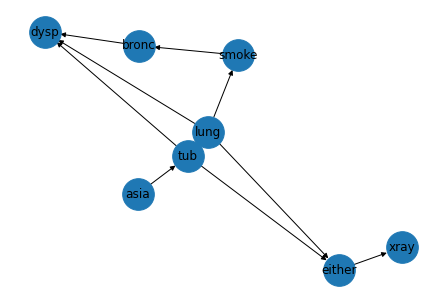

In [7]:
nodes = list(estimated_model_k2.nodes())
edges = list(estimated_model_k2.edges())

# Create Graph
G = nx.DiGraph()

# Add Nodes
for node in nodes:
    G.add_node(node)
    
# Add Edges
for edge in edges:
    G.add_edge(edge[0], edge[1])
    
# Draw Graph
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=1000, arrows=True)
plt.show()

### 2 - Puntaje

In [8]:
print(scoring_method.score(estimated_model_k2))

-223501.6696113951


### 3 - Estimación de Estructura - Puntaje BIC

In [9]:
scoring_method = BicScore(data=df)
esth = HillClimbSearch(data=df)

estimated_model_bic = esth.estimate(
    scoring_method=scoring_method,
    max_indegree=4,
    max_iter=int(1e4)
    )

  0%|          | 0/10000 [00:00<?, ?it/s]

In [10]:
print(estimated_model_bic)
print(estimated_model_bic.nodes())
print(estimated_model_bic.edges())

DAG with 8 nodes and 11 edges
['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp']
[('tub', 'lung'), ('tub', 'asia'), ('lung', 'smoke'), ('bronc', 'smoke'), ('bronc', 'tub'), ('either', 'lung'), ('either', 'tub'), ('either', 'dysp'), ('either', 'bronc'), ('xray', 'either'), ('dysp', 'bronc')]


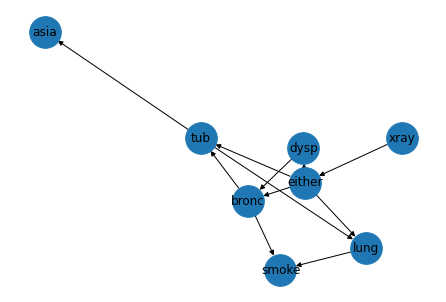

In [13]:
nodes = list(estimated_model_bic.nodes())
edges = list(estimated_model_bic.edges())

# Create Graph
G = nx.DiGraph()

# Add Nodes
for node in nodes:
    G.add_node(node)
    
# Add Edges
for edge in edges:
    G.add_edge(edge[0], edge[1])
    
# Draw Graph
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=1000, arrows=True)
plt.show()

In [14]:
print(scoring_method.score(estimated_model_bic))

-223511.1755785502
